<a href="https://colab.research.google.com/github/Luckysolex/Data-Science-Projects/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression Model

## Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Missing values per column
print("Missing Values in each Column")

print(df.isnull().sum())

Missing Values in each Column
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


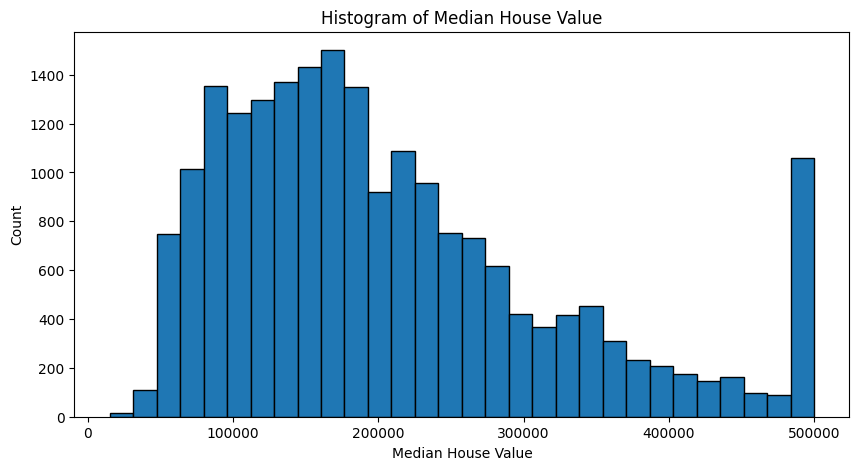

In [ ]:
# Histogram for Median House Value
plt.figure(figsize=(10,5))
plt.hist(df['median_house_value'], bins=30, edgecolor='black')
plt.xlabel('Median House Value')
plt.ylabel('Count')
plt.title('Histogram of Median House Value')
plt.show()

In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


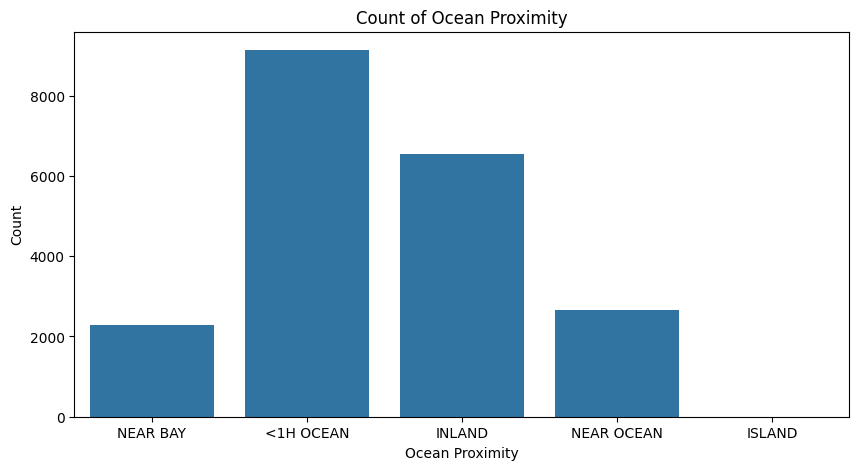

In [ ]:
# Ocean proximity analysis
plt.figure(figsize=(10,5))
sns.countplot(x='ocean_proximity', data=df)
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Count of Ocean Proximity')
plt.show()

In [ ]:
df = df.dropna()

## Splitting Data into Training and Testing set
We use the 80/20 rule to split the data into:
80% Training Data, and
20% Testing Data.

In [ ]:
from re import X
# Features (Multiple Predictors)
X = df[["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]]

# Target (Single Predictor)
y = df["median_house_value"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**What each term means**

**X_train and y_train**
* 80% of the data → used to train (teach) the model.

**X_test and y_test**
* 20% of the data → used to test the model.

**test_size = 0.2**
* Means 20% of the data is kept for testing, and 80% is used for training.

**random_state = 42**
* Makes sure the data is split the same way every time you run the code.
This helps you get consistent results.

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Finding the Coefficient for each feature

In [ ]:
# Slope for each feature (X) variable
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

# Intercept
intercept = model.intercept_

display(coefficients)
print(f"Intercept: {intercept}")

,Feature,Coefficient
0,longitude,-42546.706006
1,latitude,-42336.042987
2,housing_median_age,1155.097108
3,total_rooms,-8.440418
4,total_bedrooms,115.830375
5,population,-36.758767
6,households,41.640434
7,median_income,40293.278408


Intercept: -3569674.5266952454


A DataFrame to visually pair each feature with its corresponding coefficient, making it easy to interpret.

* **X_train.columns:** This gets the names of the features (independent variables) used to train the model.

* **model.coef_:** This gives the coefficients (slopes) assigned to each feature by the linear regression model.

The regression equation looks like:

$$
ŷ = β₀ + β₁x₁ + β₂x₂ + ⋯ + β₈x₈
$$

$$
Prediction = (Coefficient₁ × Feature₁) + (Coefficient₂ × Feature₂) + ⋯ + Intercept
$$

Where each β is a coefficient and x is a feature.

In [ ]:
y_pred = model.predict(X_train)
print(y_pred)

[245906.31381088 141217.81122485 214449.14583332 ... 211607.39708827
 251771.91227101 257502.07643588]


In [ ]:
results_df = pd.DataFrame({
    "Actual": y_train,
    "Predicted": y_pred
})

display(results_df.head())

,Actual,Predicted
17727,227600.0,245906.313811
2057,110400.0,141217.811225
6453,248100.0,214449.145833
4619,305600.0,169887.750297
15266,214600.0,194069.984620


In [ ]:
y_pred_test = model.predict(X_test)
print(y_pred_test)

[197058.03752153 157508.79088918 202099.26270386 ... 131098.67538845
 155468.78077784 166363.59962367]


In [ ]:
results_df_test = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_test
})

display(results_df_test.head())

,Actual,Predicted
14416,245800.0,197058.037522
16383,137900.0,157508.790889
7731,218200.0,202099.262704
1410,220800.0,173501.822738
1335,170500.0,213795.184175


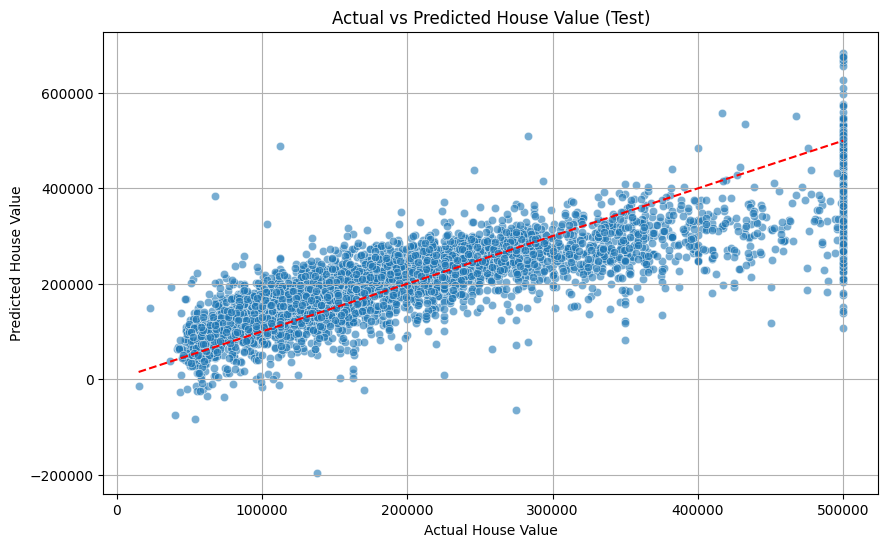

In [ ]:
# Scatter plot for Actual vs predicted House value (Test)
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs Predicted House Value (Test)')
plt.grid(True)
plt.show()

### **Interpretation of the Actual vs. Predicted Plot**

*   **Red Dashed Line:** This line represents a perfect prediction (where actual equals predicted). The closer the data points are to this line, the better the model's performance.
*   **Scatter Points:** Each point represents a single data entry from the test set. The x-coordinate is the actual house value, and the y-coordinate is the model's predicted house value.

This plot helps us visually assess:
*   **Model Accuracy:** How close the predicted values are to the actual values.
*   **Bias:** If points are consistently above or below the red line, it indicates a systematic over- or under-prediction.
*   **Variance:** How spread out the predictions are for similar actual values.
*   **Outliers:** Any points that are far off from the red line, indicating predictions that are significantly different from the actual values.

#**Evaluation Metrics**

Evaluation metrics are numbers used to check how well a machine learning model is performing.

They help us answer questions like:

* Is the model doing a good job?

* Is this model better than another one?

**Why Evaluation Metrics Are Important**

Without evaluation metrics:

* You can’t tell if a model is good or bad

* You can’t compare different models

* You can’t improve or adjust a model properly

Evaluation metrics give clear, objective results that help you make better decisions.

##**Regression Metrics**

**Mean Absolute Error (MAE)**

MAE measures the average difference between the model’s predictions and the actual values.

It looks at how far off the predictions are, without caring whether the model over-predicts or under-predicts.

* Lower MAE = better model

**What MAE tells you**

* “On average, how far are my predictions from the real values?”

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

Where:
- $n$ is the number of data points.
- $y_i$ is the actual value for the $i$-th data point.
- $\hat{y}_i$ is the predicted value for the $i$-th data point.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 51372.67


**Calculate percentage error**

Percentage error tells you how big your mistakes are compared to the typical value, making the model’s accuracy easier to understand.

In [ ]:
average_house_price = df['median_house_value'].mean()
percentage_error = (mae / average_house_price) * 100
print(f"Percentage Error: {percentage_error:.2f}%")

Percentage Error: 24.83%


This tells us that, on average, our model predicts house prices within 25% of the actual price.

In [ ]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred)

print(f"R-squared (R2) Score (train): {r2_train:.2f}")
print(f"R-squared (R2) Score (test): {r2_test:.2f}")

R-squared (R2) Score (train): 0.64
R-squared (R2) Score (test): 0.64


## **R-squared (Coefficient of Determination)**

R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that can be explained by the independent variables in a regression model. It indicates how well the model's predictions fit the actual data points.

*   **R-squared values range from 0 to 1 (or 0% to 100%).**
*   A higher R-squared value indicates that the model explains a larger proportion of the variance, meaning a better fit to the data.
*   For example, an R-squared of 0.75 means that 75% of the variance in the dependent variable can be explained by the independent variables in the model.

**Interpretation:**

*   **0.0 - 0.3:** Very low or no linear relationship.
*   **0.3 - 0.5:** Weak linear relationship.
*   **0.5 - 0.7:** Moderate linear relationship.
*   **0.7 - 1.0:** Strong linear relationship.